# K Means Clustering

In [ ]:
#Kita Butuh Import terlebih dahulu untuk mencari K Means Clustering dan Hierarchy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
# Dataset sebelumnya dari Kaggle 
data = pd.read_csv('SNAP_history_1969_2019.csv')
data.head()

,Fiscal Year,Average Participation,Average Benefit Per Person,Total Benefits(M),Other Costs,Total Costs(M)
0,1969,28.78,6.63,228.8,21.7,250.5
1,1970,43.40,10.55,549.7,27.2,576.9
2,1971,93.68,13.55,"1,522.70",53.2,"1,575.90"
3,1972,11.11,13.48,"1,797.30",69.4,"1,866.70"
4,1973,12.17,14.60,"2,131.40",76,"2,207.40"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fiscal Year                 51 non-null     int64  
 1   Average Participation       51 non-null     float64
 2   Average Benefit Per Person  51 non-null     float64
 3   Total Benefits(M)           51 non-null     object 
 4   Other Costs                 51 non-null     object 
 5   Total Costs(M)              51 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 2.5+ KB


In [ ]:
data.columns.tolist()

['Fiscal Year',
 'Average Participation',
 'Average Benefit Per Person',
 'Total Benefits(M)',
 'Other Costs',
 'Total Costs(M)']

In [ ]:
data = data.drop(["Fiscal Year","Total Benefits(M)", "Other Costs", "Total Costs(M)"], axis=1)
data.head()

,Average Participation,Average Benefit Per Person
0,28.78,6.63
1,43.40,10.55
2,93.68,13.55
3,11.11,13.48
4,12.17,14.60


In [ ]:
data_x = data.iloc[:, 0:4]
data_x.head()

,Average Participation,Average Benefit Per Person
0,28.78,6.63
1,43.40,10.55
2,93.68,13.55
3,11.11,13.48
4,12.17,14.60


In [ ]:
data.describe()

,Average Participation,Average Benefit Per Person
count,51.000000,51.000000
mean,27.476863,69.168235
std,13.932676,39.653539
min,11.110000,6.630000
25%,18.955000,39.330000
50%,22.630000,69.230000
75%,31.135000,95.465000
max,93.680000,133.850000


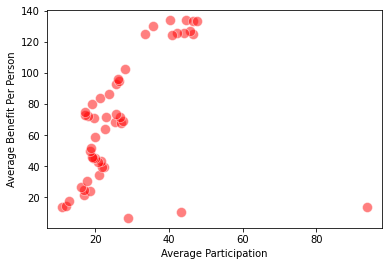

In [ ]:
sns.scatterplot(x="Average Participation", y="Average Benefit Per Person", data=data, s=100, color="red", alpha = 0.5)

In [ ]:
#Menampilkan dataset menjadi Array List
x_array = np.array(data_x)
print(x_array)

[[ 28.78   6.63]
 [ 43.4   10.55]
 [ 93.68  13.55]
 [ 11.11  13.48]
 [ 12.17  14.6 ]
 [ 12.86  17.61]
 [ 17.06  21.4 ]
 [ 18.55  23.93]
 [ 17.08  24.71]
 [ 16.24  26.77]
 [ 17.65  30.59]
 [ 21.08  34.47]
 [ 22.43  39.49]
 [ 21.72  39.17]
 [ 21.63  42.98]
 [ 20.85  42.74]
 [ 19.9   44.99]
 [ 19.43  45.49]
 [ 19.11  45.78]
 [ 18.65  49.83]
 [ 18.81  51.71]
 [ 20.05  58.78]
 [ 22.63  63.78]
 [ 25.41  68.57]
 [ 26.99  67.95]
 [ 27.47  69.23]
 [ 26.62  71.27]
 [ 25.54  73.21]
 [ 22.86  71.27]
 [ 19.79  71.12]
 [ 18.18  72.27]
 [ 17.19  72.62]
 [ 17.32  74.81]
 [ 19.1   79.67]
 [ 21.25  83.94]
 [ 23.81  86.16]
 [ 25.63  92.89]
 [ 26.55  94.75]
 [ 26.32  96.18]
 [ 28.22 102.19]
 [ 33.49 125.31]
 [ 40.3  133.79]
 [ 44.71 133.85]
 [ 46.61 133.41]
 [ 47.64 133.07]
 [ 46.66 125.01]
 [ 45.77 126.81]
 [ 44.22 125.4 ]
 [ 42.32 125.47]
 [ 40.78 124.5 ]
 [ 35.7  129.83]]


In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
print(x_scaled)

[[0.21400024 0.        ]
 [0.39106213 0.03081277]
 [1.         0.05439396]
 [0.         0.05384374]
 [0.01283759 0.06264738]
 [0.02119414 0.08630718]
 [0.07206007 0.1160981 ]
 [0.09010537 0.13598491]
 [0.07230229 0.14211602]
 [0.0621291  0.15830844]
 [0.07920552 0.18833517]
 [0.12074603 0.21883352]
 [0.1370958  0.25829272]
 [0.12849703 0.25577739]
 [0.12740705 0.28572551]
 [0.11796052 0.28383902]
 [0.10645513 0.30152492]
 [0.10076299 0.30545512]
 [0.09688749 0.30773463]
 [0.09131646 0.33956925]
 [0.09325421 0.3543468 ]
 [0.10827177 0.40991982]
 [0.13951798 0.44922182]
 [0.17318639 0.48687313]
 [0.19232167 0.48199969]
 [0.19813492 0.492061  ]
 [0.18784062 0.50809621]
 [0.17476081 0.52334539]
 [0.1423035  0.50809621]
 [0.10512293 0.50691715]
 [0.08562432 0.51595661]
 [0.07363449 0.51870775]
 [0.07520891 0.53592202]
 [0.09676638 0.57412357]
 [0.12280489 0.60768747]
 [0.15380889 0.62513756]
 [0.17585079 0.67803804]
 [0.18699285 0.69265839]
 [0.18420734 0.70389876]
 [0.20721812 0.75113976]


In [ ]:
kmeans = KMeans(n_clusters = 5, random_state=123)
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [ ]:
print(kmeans.cluster_centers_)

[[0.10148965 0.09744537]
 [0.38093298 0.96005488]
 [0.1486281  0.56443781]
 [1.         0.05439396]
 [0.11169586 0.30191079]]


In [ ]:
print(kmeans.labels_)
data["kluster"] = kmeans.labels_
data.head()

[0 0 3 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 1 1 1 1 1 1 1 1 1]


,Average Participation,Average Benefit Per Person,kluster
0,28.78,6.63,0
1,43.40,10.55,0
2,93.68,13.55,3
3,11.11,13.48,0
4,12.17,14.60,0


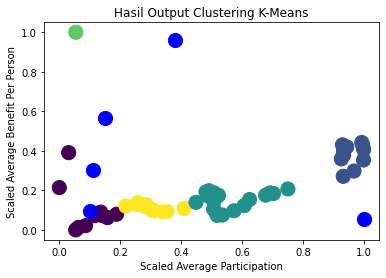

In [ ]:
fig, ax = plt.subplots()
sct = ax.scatter(x_scaled[:,1], x_scaled[:,0], s = 200,
c = data.kluster, marker = "o", alpha = 1.0)
centers = kmeans.cluster_centers_
ax.scatter(centers[:,0], centers[:,1], c='blue', s=200, alpha=1.0);
plt.title("Hasil Output Clustering K-Means")
plt.xlabel("Scaled Average Participation")
plt.ylabel("Scaled Average Benefit Per Person")
plt.show()

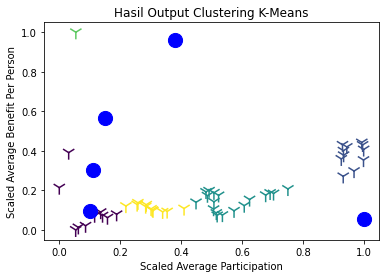

In [ ]:
fig, ax = plt.subplots()
sct = ax.scatter(x_scaled[:,1], x_scaled[:,0], s = 200,
c = data.kluster, marker = "1", alpha = 1.0)
centers = kmeans.cluster_centers_
ax.scatter(centers[:,0], centers[:,1], c='blue', s=200, alpha=1.0);
plt.title("Hasil Output Clustering K-Means")
plt.xlabel("Scaled Average Participation")
plt.ylabel("Scaled Average Benefit Per Person")
plt.show()

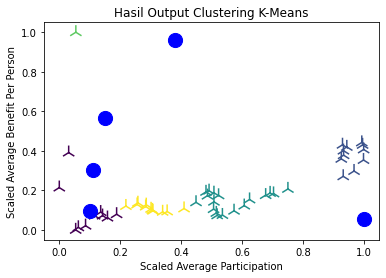

In [ ]:
fig, ax = plt.subplots()
sct = ax.scatter(x_scaled[:,1], x_scaled[:,0], s = 200,
c = data.kluster, marker = "2", alpha = 1.0)
centers = kmeans.cluster_centers_
ax.scatter(centers[:,0], centers[:,1], c='blue', s=200, alpha=1.0);
plt.title("Hasil Output Clustering K-Means")
plt.xlabel("Scaled Average Participation")
plt.ylabel("Scaled Average Benefit Per Person")
plt.show()

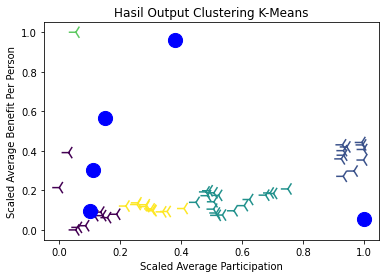

In [ ]:
fig, ax = plt.subplots()
sct = ax.scatter(x_scaled[:,1], x_scaled[:,0], s = 200,
c = data.kluster, marker = "3", alpha = 1.0)
centers = kmeans.cluster_centers_
ax.scatter(centers[:,0], centers[:,1], c='blue', s=200, alpha=1.0);
plt.title("Hasil Output Clustering K-Means")
plt.xlabel("Scaled Average Participation")
plt.ylabel("Scaled Average Benefit Per Person")
plt.show()

# Hiralki

In [59]:
data

,Average Participation,Average Benefit Per Person,kluster
0,28.78,6.63,0
1,43.40,10.55,0
2,93.68,13.55,3
3,11.11,13.48,0
4,12.17,14.60,0
5,12.86,17.61,0
6,17.06,21.40,0
7,18.55,23.93,0
8,17.08,24.71,0
9,16.24,26.77,0


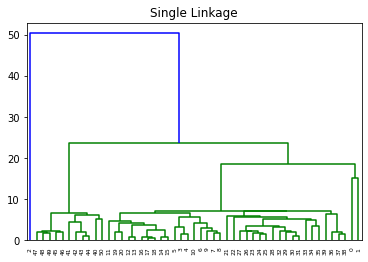

In [60]:
mergins_single = linkage(data, method="single", metric = "euclidean")
dendrogram(mergins_single)
plt.title("Single Linkage")
plt.show()

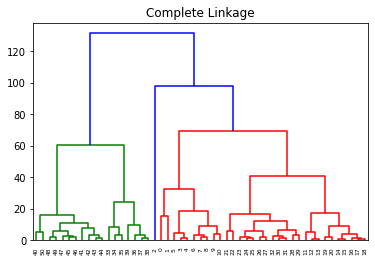

In [63]:
mergings_complete = linkage(data, method="complete", metric = "euclidean")
dendrogram(mergings_complete)
plt.title("Complete Linkage")
plt.show()

In [64]:
cluster_hierarchy = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_hierarchy

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2])

In [75]:
data["cluster hierarchy"] = cluster_hierarchy
data

,Average Participation,Average Benefit Per Person,kluster,cluster hierarchy
0,28.78,6.63,0,0
1,43.40,10.55,0,0
2,93.68,13.55,3,1
3,11.11,13.48,0,0
4,12.17,14.60,0,0
5,12.86,17.61,0,0
6,17.06,21.40,0,0
7,18.55,23.93,0,0
8,17.08,24.71,0,0
9,16.24,26.77,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


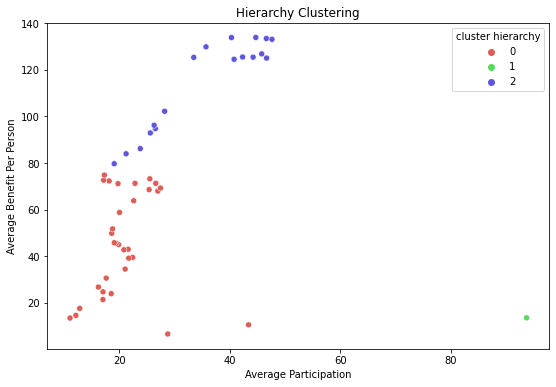

In [76]:
plt.figure(figsize = (9,6))
sns.scatterplot(data['Average Participation'], data['Average Benefit Per Person'], hue=data['cluster hierarchy'], palette=sns.color_palette('hls', 3))
plt.title('Hierarchy Clustering')
plt.show()